In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sales1=pd.read_excel(r"C:\Users\Niloy\OneDrive\Documents\sales1.xlsx")

In [3]:
sales1

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


In [4]:
#number of row and columns
sales1.shape

(3636, 6)

In [5]:
# all columns and its data types
sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 170.6+ KB


In [6]:
# checking duplicated values
sales1.duplicated().sum()

np.int64(0)

In [7]:
#if there any nun values
sales1.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [8]:
# to see all rows who has any nun values


sales1[sales1.isnull().any(axis=1)]

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.0,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.0,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.0,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.0,Americano with Milk


In [9]:
# i dont want card number because i dont need in my analysis
sales1 = sales1.dropna(axis=1)

In [10]:
sales1

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte
...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,25.96,Americano


In [11]:
#total revenue
round(sales1['money'].sum(),0)

np.float64(115432.0)

In [12]:
# pie chart from type wise coffiee distribution
sales1_pie=sales1.groupby('coffee_name')['coffee_name'].value_counts().sort_values(ascending=False)

Text(0, 0.5, '')

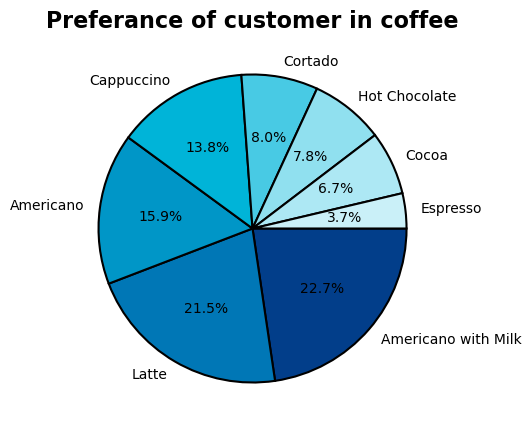

In [13]:
plt.figure(figsize=(5, 5))
sales1_pie.plot(kind='pie',autopct='%1.1f%%',wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},colors=['#023e8a','#0077b6','#0096c7','#00b4d8','#48cae4','#90e0ef','#ade8f4','#caf0f8'],counterclock=False)
plt.title('Preferance of customer in coffee', fontsize=16, fontweight='bold')
plt.ylabel('')

In [14]:
sales1_pie

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

In [15]:
# to find type of payment mode
sales1paymenttt=sales1.groupby('cash_type')['cash_type'].value_counts()

Text(0, 0.5, '')

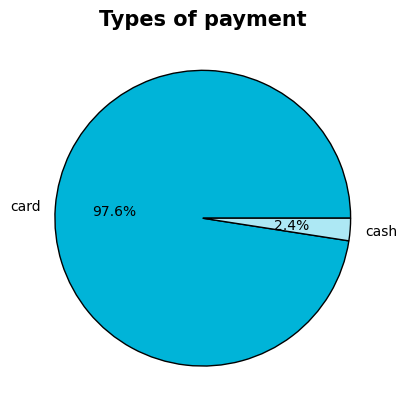

In [16]:
colors = plt.cm.Paired(range(len(sales1_pie)))
sales1paymenttt.plot(kind='pie',autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},colors=['#00b4d8','#ade8f4'])
plt.title('Types of payment',fontsize=15,fontweight='bold')
plt.ylabel('')

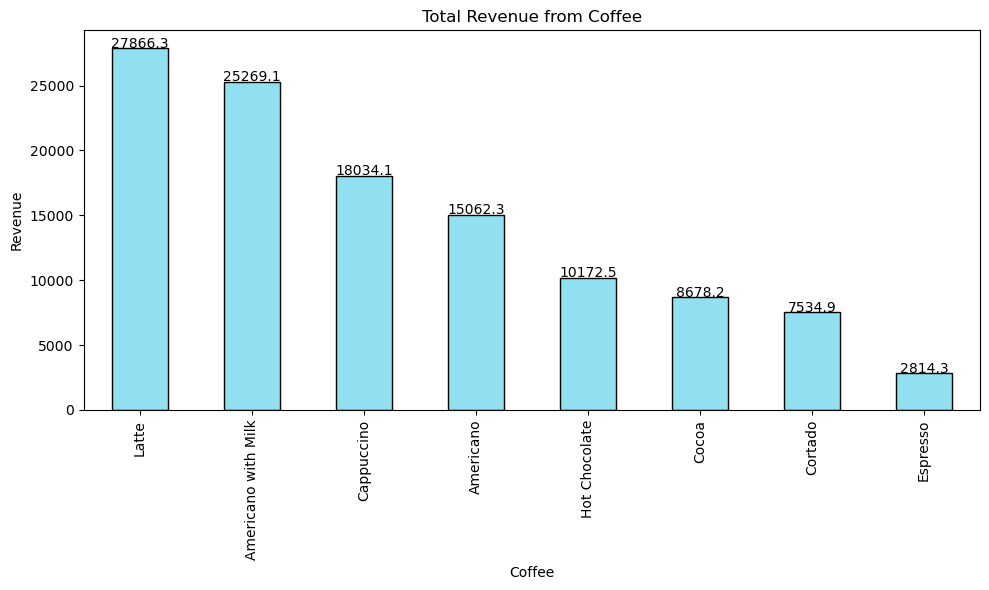

In [48]:
# revenue from different coffee
plt.figure(figsize=(10,6))
coffee_rev_sum.plot(kind='bar', color='#90e0ef', edgecolor='black')
plt.title('Total Revenue from Coffee')
plt.xlabel('Coffee')
plt.ylabel('Revenue')

for i, v in enumerate(coffee_rev_sum):
    plt.text(i, v + 50, f'{v:.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [46]:
coffee_rev_sum=sales1.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

In [47]:
coffee_rev_sum

coffee_name
Latte                  27866.30
Americano with Milk    25269.12
Cappuccino             18034.14
Americano              15062.26
Hot Chocolate          10172.46
Cocoa                   8678.16
Cortado                 7534.86
Espresso                2814.28
Name: money, dtype: float64

In [42]:
sales1

,date,datetime,cash_type,money,coffee_name,year,month,day
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte,2024,3,1
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate,2024,3,1
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate,2024,3,1
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano,2024,3,1
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte,2024,3,1
...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,35.76,Cappuccino,2025,3,23
3632,2025-03-23,2025-03-23 14:43:37.362,card,35.76,Cocoa,2025,3,23
3633,2025-03-23,2025-03-23 14:44:16.864,card,35.76,Cocoa,2025,3,23
3634,2025-03-23,2025-03-23 15:47:28.723,card,25.96,Americano,2025,3,23


In [18]:
#different types of coffee and its price
coffee_price=round(sales1.groupby('coffee_name')['money'].mean().sort_values(),2)

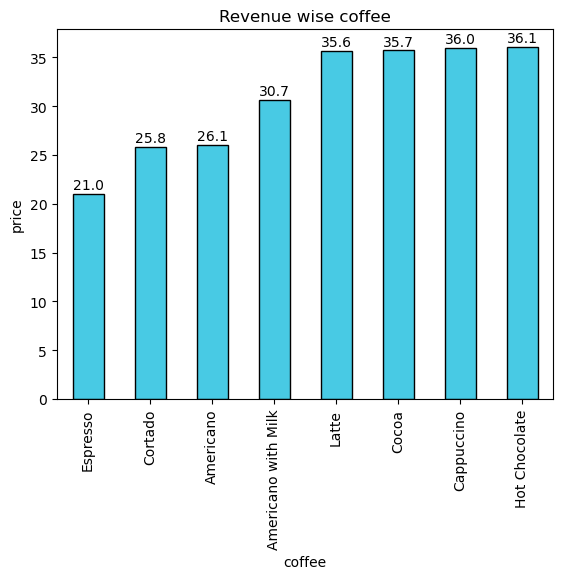

In [19]:
coffee_price.plot(kind='bar',color=['#48cae4'],edgecolor='black')
plt.title('Revenue wise coffee')
plt.xlabel('coffee')
plt.ylabel('price')
for i, v in enumerate(coffee_price):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', fontsize=10)

In [20]:
coffee_price

coffee_name
Espresso               21.00
Cortado                25.80
Americano              26.06
Americano with Milk    30.67
Latte                  35.63
Cocoa                  35.71
Cappuccino             36.00
Hot Chocolate          36.07
Name: money, dtype: float64

In [21]:
# now want to make some operation with date and time
sales1['datetime'] = pd.to_datetime(sales1['datetime'])


C:\Users\Niloy\AppData\Local\Temp\ipykernel_23032\2584589521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales1['datetime'] = pd.to_datetime(sales1['datetime'])


In [22]:
# checking the data type weather it is data time or some thing else
sales1.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
money                 float64
coffee_name            object
dtype: object

In [23]:
# add some new column 
sales1['year'] = sales1['datetime'].dt.year
sales1['month'] = sales1['datetime'].dt.month
sales1['day'] = sales1['datetime'].dt.day



In [24]:
sales1

,date,datetime,cash_type,money,coffee_name,year,month,day
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte,2024,3,1
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate,2024,3,1
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate,2024,3,1
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano,2024,3,1
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte,2024,3,1
...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,35.76,Cappuccino,2025,3,23
3632,2025-03-23,2025-03-23 14:43:37.362,card,35.76,Cocoa,2025,3,23
3633,2025-03-23,2025-03-23 14:44:16.864,card,35.76,Cocoa,2025,3,23
3634,2025-03-23,2025-03-23 15:47:28.723,card,25.96,Americano,2025,3,23


In [25]:
# yearly sales
yearly_sales=sales1.groupby('year')['year'].value_counts()

Text(0.5, 1.0, 'Yearly sales')

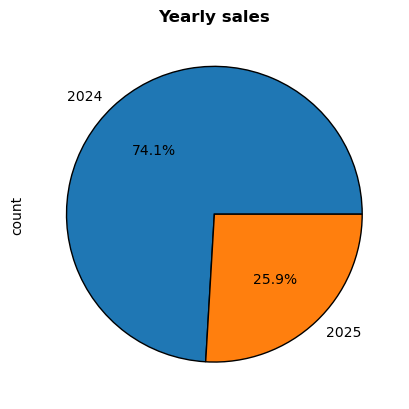

In [26]:
yearly_sales.plot(kind='pie',autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Yearly sales',fontweight='bold')

In [27]:
# mothly customers number
monthly_sales=sales1.groupby('month')['month'].value_counts()

In [29]:
# month wise customer
monthly_sales=sales1.groupby('month')['month'].value_counts().sort_index()

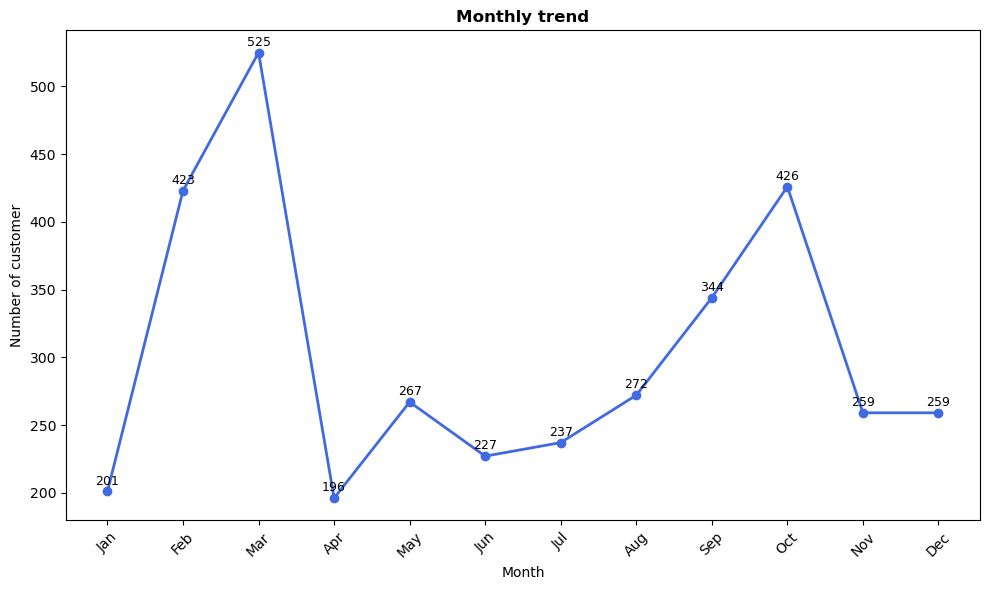

In [30]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, color='royalblue')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           rotation=45)
for x, y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y + 5, f'{y:.0f}', ha='center', fontsize=9)
plt.title('Monthly trend',fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of customer')
plt.tight_layout()
plt.show()

In [31]:
# now want to find in which months which coffee is best seller
monthwise_coff = sales1.groupby(['month', 'coffee_name']).size().reset_index(name='sales_count')

In [32]:

monthwise_high=monthwise_coff.loc[
    monthwise_coff.groupby('month')['sales_count'].idxmax()
]


In [33]:
monthwise_high

,month,coffee_name,sales_count
1,1,Americano with Milk,52
8,2,Americano,117
16,3,Americano,138
26,4,Cappuccino,43
33,5,Americano with Milk,58
41,6,Americano with Milk,69
49,7,Americano with Milk,65
57,8,Americano with Milk,72
65,9,Americano with Milk,104
79,10,Latte,120


In [34]:
# pivot table of month and type of coffee and there counts
monthly_pivot=monthwise_coff.pivot(index='month',columns='coffee_name',values='sales_count')

In [35]:
monthly_pivot['Grand_total']=monthly_pivot.sum(axis=1)

In [36]:
monthly_pivot

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,Grand_total
month,,,,,,,,,
1,25,52,27,14,22,5,15,41,201
2,117,85,52,56,10,17,32,54,423
3,138,86,63,36,32,20,45,105,525
4,35,42,43,6,19,7,13,31,196
5,48,58,55,9,17,8,14,58,267
6,14,69,46,5,19,10,14,50,227
7,36,65,32,9,14,14,11,56,237
8,37,72,34,11,40,14,6,58,272
9,32,104,41,9,41,12,11,94,344


In [37]:
sales1

,date,datetime,cash_type,money,coffee_name,year,month,day
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte,2024,3,1
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate,2024,3,1
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate,2024,3,1
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano,2024,3,1
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte,2024,3,1
...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,35.76,Cappuccino,2025,3,23
3632,2025-03-23,2025-03-23 14:43:37.362,card,35.76,Cocoa,2025,3,23
3633,2025-03-23,2025-03-23 14:44:16.864,card,35.76,Cocoa,2025,3,23
3634,2025-03-23,2025-03-23 15:47:28.723,card,25.96,Americano,2025,3,23


In [38]:
# different payment method and there revenue
cash_money=round(sales1.groupby('cash_type')['money'].sum().sort_values(ascending=True),1)

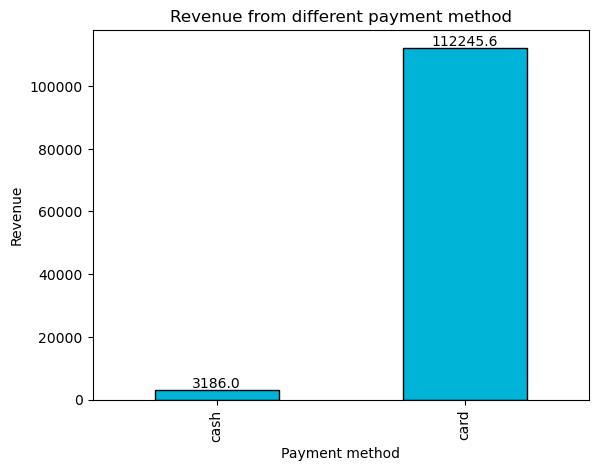

In [39]:
cash_money.plot(kind='bar',edgecolor='black',color={'#00b4d8'})
plt.xlabel('Payment method')
plt.ylabel('Revenue')
plt.title('Revenue from different payment method')
for i,v in enumerate(cash_money.values):
    plt.text(i,v+650,str(v),ha='center')

In [40]:
#monthly sales
monthly_sales_sum=round(sales1.groupby('month')['money'].sum().sort_index(),0)

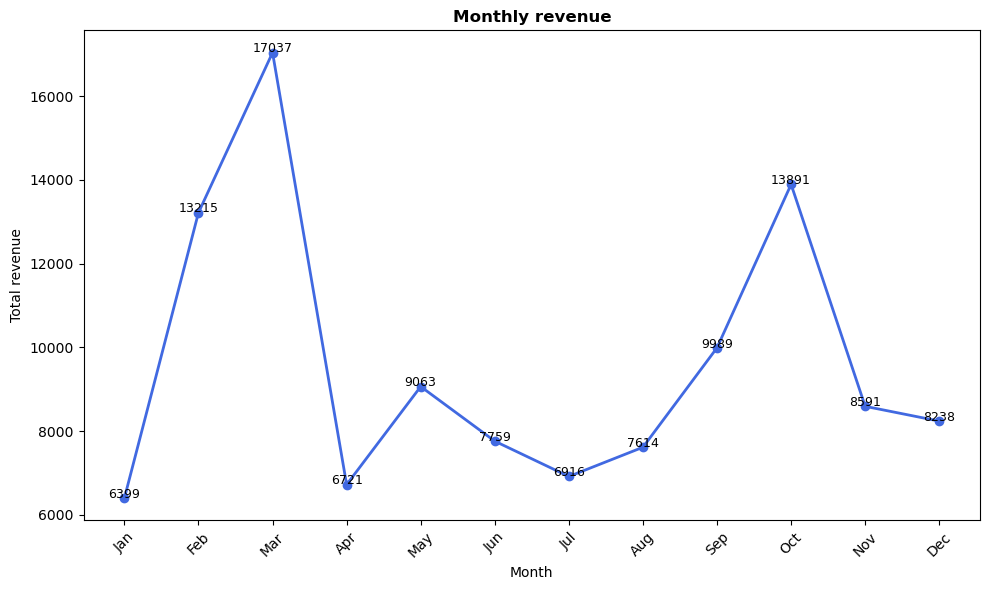

In [41]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales_sum.index, monthly_sales_sum.values, marker='o', linewidth=2, color='royalblue')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           rotation=45)
for x, y in zip(monthly_sales_sum.index, monthly_sales_sum.values):
    plt.text(x, y + 5, f'{y:.0f}', ha='center', fontsize=9)
plt.title('Monthly revenue',fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total revenue')
plt.tight_layout()
plt.show()